In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
greendata = []
for i in range(1,10):
    x = 'Images/green/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'Images/green/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'Images/green/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
         pass
greendata = np.array(greendata)

reddata = []
for i in range(1,10):
    x = 'Images/red/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'Images/red/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'Images/red/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
         pass
reddata = np.array(reddata)

redcardata = []
for i in range(1,10):
    x = 'Images/red_car/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'Images/red_car/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'Images/red_car/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
         pass
redcardata = np.array(redcardata)

greencardata = []
for i in range(1,10):
    x = 'Images/green_car/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'Images/green_car/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'Images/green_car/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
         pass
greencardata = np.array(greencardata)
print(reddata.shape)
print(greendata.shape)
print(redcardata.shape)
print(greencardata.shape)

(128, 100, 100, 3)
(149, 100, 100, 3)
(165, 100, 100, 3)
(170, 100, 100, 3)


In [55]:
import numpy as np
def same_shuffle(arr1,arr2):
    size = arr2.size
    print(size)
    idxs = np.arange(size)
    np.random.shuffle(idxs)
    return arr1[idxs], arr2[idxs]

In [56]:
greenlist = list(greendata)
redlist = list(reddata)
# greencarlist = list(greencardata)
# redcarlist = list(redcardata)
datalist = greenlist+redlist
data = np.array(datalist)
y_green = list(np.zeros(149))
y_red = list(np.zeros(128)+1)
y = np.array(y_green + y_red)
data, y = same_shuffle(data, y)
data_test = data[200:]
data = data[:200]
y_test = y[200:]
y = y[:200]
print(data_test.shape)
print(data.shape)

277
(77, 100, 100, 3)
(200, 100, 100, 3)


In [57]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [65]:
# Change these values
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 47, 47, 32)        18464     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 21, 21, 16)        4624      
_________________________________________________________________
flatten_14 (Flatten)         (None, 7056)              0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 7056)            

In [66]:
filepath = 'weights.{epoch:02d}-{val_accuracy:.2f}.h5'
j = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)]
history = model.fit(data, y, epochs=50,validation_data=(data_test,y_test), callbacks=j)

Train on 200 samples, validate on 77 samples
Epoch 1/50
200/200 [==============================] - 2s 11ms/sample - loss: 5.0616 - accuracy: 0.4200 - val_loss: 0.7277 - val_accuracy: 0.4545
Epoch 2/50
200/200 [==============================] - 2s 8ms/sample - loss: 1.0280 - accuracy: 0.5800 - val_loss: 0.6694 - val_accuracy: 0.5844
Epoch 3/50
200/200 [==============================] - 2s 8ms/sample - loss: 0.6803 - accuracy: 0.6500 - val_loss: 0.6552 - val_accuracy: 0.6364
Epoch 4/50
200/200 [==============================] - 2s 8ms/sample - loss: 0.6132 - accuracy: 0.6850 - val_loss: 0.6202 - val_accuracy: 0.6234
Epoch 5/50
200/200 [==============================] - 2s 8ms/sample - loss: 0.4972 - accuracy: 0.7150 - val_loss: 0.5958 - val_accuracy: 0.6753
Epoch 6/50
200/200 [==============================] - 2s 8ms/sample - loss: 0.6059 - accuracy: 0.7000 - val_loss: 0.6404 - val_accuracy: 0.6623
Epoch 7/50
200/200 [==============================] - 2s 8ms/sample - loss: 0.4952 - accur

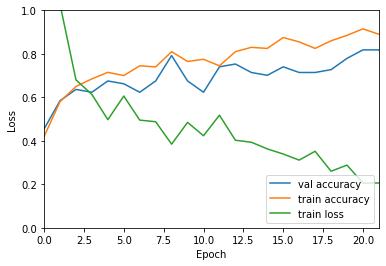

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.plot(history.history['loss'], label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.xlim([0,21])
plt.legend(loc='lower right')

In [9]:
model.save('nn.h5')

In [21]:
import tensorflow as tf
model2 = tf.keras.models.load_model('nn.h5')

In [2]:
cap = cv2.VideoCapture(0)
ret,frame = cap.read()
frame = cv2.resize(frame, (100,100))

NameError: name 'cv2' is not defined

In [ ]:
def toRGB(image):
    return image[:,:,::-1]

In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(model2)

In [23]:
tflite_model = converter.convert()

In [24]:
with open ('model.tflite', mode='wb') as file:
    file.write(tflite_model)

In [25]:
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
with open ('model_quantized.tflite', mode='wb') as file:
    file.write(tflite_quant_model)

In [20]:
model2.predict(np.argmax(np.array([data[1]], dtype=np.float32))

array([[0.5297128 , 0.47028726]], dtype=float32)